Importing libraries

In [ ]:
import pandas as pd
# Set max column width to None to show the full text in all columns
#pd.set_option('display.max_colwidth', None)

In [3]:
train=pd.read_csv("/kaggle/input/rural-kenyan-healthcare-challenge/train_raw.csv")

In [4]:
train.head()

,Master_Index,County,Health level,Years of Experience,Prompt,Nursing Competency,Clinical Panel,Clinician,GPT4.0,LLAMA,GEMINI,DDX SNOMED
0,ID_VBWWP,Uasin Gishu,Sub-county Hospitals and Nursing Homes,18.0,I am a nurse with 18 years of experience in Ge...,Pediatric Emergency Burns,SURGERY,Summary:\nA 4 year old with 5% superficial bur...,Given your vast experience as a nurse in Uasin...,1. Immediate treatment protocol for second-deg...,Here's a response addressing the questions reg...,288514009 | Burn involving 5 percent of body s...
1,ID_XMBBY,Uasin Gishu,National Referral Hospitals,17.0,I am a nurse with 17 years of experience in Ge...,Child Health,PAEDIATRICS,Summary\n6-year-old present with vomiting and ...,Clinical Summary: • A 6-year-old girl w...,Based on the symptoms and signs you've describ...,"Based on the presentation, the 6-year-old girl...",420270002 | Ketoacidosis due to type 1 diabete...
2,ID_JZNZW,Kiambu,Sub-county Hospitals and Nursing Homes,12.0,I am a nurse with 12 years of experience in Ge...,General Emergency,INTERNAL MEDICINE,Summary\nA 47-year-old man presents with sever...,"In this case, you're dealing with a 47-year-ol...","Firstly, I must commend you on your thorough h...","This 47-year-old male presenting with severe, ...",13200003 | Peptic ulcer (disorder)\n25458004 |...
3,ID_QOQTK,Uasin Gishu,National Referral Hospitals,12.0,I am a nurse with 12 years of experience in Pr...,Critical Care,INTERNAL MEDICINE,SUMMARY\n\n72-year-old female with inability t...,"Given ER's clinical presentation and vitals, t...",to me with this query. Based on the informatio...,This 92-year-old female patient (ER) presents ...,14760008 | Constipation (finding)\n419284004 |...
4,ID_ZFJBM,Uasin Gishu,National Referral Hospitals,16.0,I am a nurse with 16 years of experience in Ge...,Adult Health,INTERNAL MEDICINE,"A 22 year old female presents with headache, d...",The 22-year-old female patient is presenting w...,Thank you for presenting this case. Based on t...,This 22-year-old female patient presents with ...,95874006 | Carbon monoxide poisoning from fire...


In [5]:
train.shape

(400, 12)

In [6]:
train.dtypes

Master_Index            object
County                  object
Health level            object
Years of Experience    float64
Prompt                  object
Nursing Competency      object
Clinical Panel          object
Clinician               object
GPT4.0                  object
LLAMA                   object
GEMINI                  object
DDX SNOMED              object
dtype: object

Here we want to 'split' the prompt into more manageble pieces, which are Years of Experience, location and scenario

In [7]:
import re
train[['Exact location', 'Scenario']] = train['Prompt'].str.extract(r'I am a nurse with \d+ years of experience in ([^.]+)\.\s*(.*)', expand=True, flags=re.DOTALL)

Checking the type of the Years of experience

In [8]:
train['Years of Experience'].dtype

dtype('float64')

In [9]:
train.describe()

,Years of Experience
count,300.000000
mean,15.526667
std,8.093679
min,1.000000
25%,10.000000
50%,15.000000
75%,20.000000
max,38.000000


We noticed that there are many missing values in years of experience so we are extracting it from the prompt and filling it

In [10]:
train.isnull().sum()

Master_Index             0
County                   0
Health level             0
Years of Experience    100
Prompt                   0
Nursing Competency       0
Clinical Panel           0
Clinician                0
GPT4.0                   0
LLAMA                    0
GEMINI                   0
DDX SNOMED               1
Exact location         100
Scenario               100
dtype: int64

In [11]:
train['Extracted Years'] = train['Prompt'].str.extract(r'I am a nurse with (\d+)', flags=re.IGNORECASE).astype(float)
train['Years of Experience'] = train['Years of Experience'].fillna(train['Extracted Years'])
train.drop(columns='Extracted Years', inplace=True)

We noticed that it didn't fill the missing values

In [12]:
pd.set_option('display.max_colwidth', None)

In [ ]:
missing_rows = train[train['Years of Experience'].isnull()][['Prompt', 'Years of Experience']]
print(missing_rows)

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        Prompt  \
7                                                                                                                                     

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


We also noticed that there are missing values in scenario and location due to the prompt having another format, so we must fill them

In [ ]:
missing_exact_location = train['Exact location'].isnull().sum()
missing_exact_location

In [ ]:
missing_scenario = train['Scenario'].isnull().sum()
missing_scenario

In [ ]:
mask = train['Prompt'].str.contains(r'I am a nurse(?: working)? in a? ', case=False, na=False)

train.loc[mask, 'Scenario'] = train.loc[mask, 'Prompt'].str.extract(r'I am a nurse(?: working)? in a? [^.]+\.(.*)', expand=True, flags=re.DOTALL)[0]

missing_scenario = train['Scenario'].isnull().sum()
print(f"Missing Scenario after filling: {missing_scenario}")

In [ ]:
missing_scenario_after = train[train['Scenario'].isnull()]

print(missing_scenario_after[['Prompt', 'Scenario']])

In [ ]:
pd.reset_option('display.max_colwidth')

In [ ]:
def extract_scenario(prompt):
    if isinstance(prompt, str):
        sentences = prompt.split('.')
        return ".".join(sentences[1:]).strip() if len(sentences) > 1 else ""
    return "" 

missing_scenario_rows = train['Scenario'].isnull()

train.loc[missing_scenario_rows, 'Scenario'] = train.loc[missing_scenario_rows, 'Prompt'].apply(extract_scenario)

print(train[['Prompt', 'Scenario']].head(10))
print("\nNumber of missing 'scenario' values after filling:", train['Scenario'].isnull().sum())
train.isnull().sum()

In [ ]:
train.head()

In [21]:
train ["Scenario"].head()

0    A 4-year-old child presents to the emergency d...
1    A 6 year old girl presented to the emergency d...
2    Forty-seven years, old man, came to Casualty, ...
3    ER, aged 92 years, female was brought in with ...
4    A 22-year-old female patient is brought in wit...
Name: Scenario, dtype: object

In [22]:
cols=train.columns.to_list()

In [23]:
cols.insert(cols.index('Clinician') - 1, cols.pop(cols.index('Scenario')))

train = train[cols]

In [24]:
train.head()

,Master_Index,County,Health level,Years of Experience,Prompt,Nursing Competency,Scenario,Clinical Panel,Clinician,GPT4.0,LLAMA,GEMINI,DDX SNOMED,Exact location
0,ID_VBWWP,Uasin Gishu,Sub-county Hospitals and Nursing Homes,18.0,I am a nurse with 18 years of experience in Ge...,Pediatric Emergency Burns,A 4-year-old child presents to the emergency d...,SURGERY,Summary:\nA 4 year old with 5% superficial bur...,Given your vast experience as a nurse in Uasin...,1. Immediate treatment protocol for second-deg...,Here's a response addressing the questions reg...,288514009 | Burn involving 5 percent of body s...,General nursing working in a Sub-county Hospit...
1,ID_XMBBY,Uasin Gishu,National Referral Hospitals,17.0,I am a nurse with 17 years of experience in Ge...,Child Health,A 6 year old girl presented to the emergency d...,PAEDIATRICS,Summary\n6-year-old present with vomiting and ...,Clinical Summary: • A 6-year-old girl w...,Based on the symptoms and signs you've describ...,"Based on the presentation, the 6-year-old girl...",420270002 | Ketoacidosis due to type 1 diabete...,General nursing working in a National Referral...
2,ID_JZNZW,Kiambu,Sub-county Hospitals and Nursing Homes,12.0,I am a nurse with 12 years of experience in Ge...,General Emergency,"Forty-seven years, old man, came to Casualty, ...",INTERNAL MEDICINE,Summary\nA 47-year-old man presents with sever...,"In this case, you're dealing with a 47-year-ol...","Firstly, I must commend you on your thorough h...","This 47-year-old male presenting with severe, ...",13200003 | Peptic ulcer (disorder)\n25458004 |...,General nursing working in a Sub-county Hospit...
3,ID_QOQTK,Uasin Gishu,National Referral Hospitals,12.0,I am a nurse with 12 years of experience in Pr...,Critical Care,"ER, aged 92 years, female was brought in with ...",INTERNAL MEDICINE,SUMMARY\n\n72-year-old female with inability t...,"Given ER's clinical presentation and vitals, t...",to me with this query. Based on the informatio...,This 92-year-old female patient (ER) presents ...,14760008 | Constipation (finding)\n419284004 |...,Primary care working in a National Referral Ho...
4,ID_ZFJBM,Uasin Gishu,National Referral Hospitals,16.0,I am a nurse with 16 years of experience in Ge...,Adult Health,A 22-year-old female patient is brought in wit...,INTERNAL MEDICINE,"A 22 year old female presents with headache, d...",The 22-year-old female patient is presenting w...,Thank you for presenting this case. Based on t...,This 22-year-old female patient presents with ...,95874006 | Carbon monoxide poisoning from fire...,General nursing working in a National Referral...


In [25]:
train['Exact location'].head()

0    General nursing working in a Sub-county Hospit...
1    General nursing working in a National Referral...
2    General nursing working in a Sub-county Hospit...
3    Primary care working in a National Referral Ho...
4    General nursing working in a National Referral...
Name: Exact location, dtype: object

In [26]:
train['Exact work'] = train['Exact location'].str.extract(r'^(.*?)\s+working in')

In [27]:
train.head()

,Master_Index,County,Health level,Years of Experience,Prompt,Nursing Competency,Scenario,Clinical Panel,Clinician,GPT4.0,LLAMA,GEMINI,DDX SNOMED,Exact location,Exact work
0,ID_VBWWP,Uasin Gishu,Sub-county Hospitals and Nursing Homes,18.0,I am a nurse with 18 years of experience in Ge...,Pediatric Emergency Burns,A 4-year-old child presents to the emergency d...,SURGERY,Summary:\nA 4 year old with 5% superficial bur...,Given your vast experience as a nurse in Uasin...,1. Immediate treatment protocol for second-deg...,Here's a response addressing the questions reg...,288514009 | Burn involving 5 percent of body s...,General nursing working in a Sub-county Hospit...,General nursing
1,ID_XMBBY,Uasin Gishu,National Referral Hospitals,17.0,I am a nurse with 17 years of experience in Ge...,Child Health,A 6 year old girl presented to the emergency d...,PAEDIATRICS,Summary\n6-year-old present with vomiting and ...,Clinical Summary: • A 6-year-old girl w...,Based on the symptoms and signs you've describ...,"Based on the presentation, the 6-year-old girl...",420270002 | Ketoacidosis due to type 1 diabete...,General nursing working in a National Referral...,General nursing
2,ID_JZNZW,Kiambu,Sub-county Hospitals and Nursing Homes,12.0,I am a nurse with 12 years of experience in Ge...,General Emergency,"Forty-seven years, old man, came to Casualty, ...",INTERNAL MEDICINE,Summary\nA 47-year-old man presents with sever...,"In this case, you're dealing with a 47-year-ol...","Firstly, I must commend you on your thorough h...","This 47-year-old male presenting with severe, ...",13200003 | Peptic ulcer (disorder)\n25458004 |...,General nursing working in a Sub-county Hospit...,General nursing
3,ID_QOQTK,Uasin Gishu,National Referral Hospitals,12.0,I am a nurse with 12 years of experience in Pr...,Critical Care,"ER, aged 92 years, female was brought in with ...",INTERNAL MEDICINE,SUMMARY\n\n72-year-old female with inability t...,"Given ER's clinical presentation and vitals, t...",to me with this query. Based on the informatio...,This 92-year-old female patient (ER) presents ...,14760008 | Constipation (finding)\n419284004 |...,Primary care working in a National Referral Ho...,Primary care
4,ID_ZFJBM,Uasin Gishu,National Referral Hospitals,16.0,I am a nurse with 16 years of experience in Ge...,Adult Health,A 22-year-old female patient is brought in wit...,INTERNAL MEDICINE,"A 22 year old female presents with headache, d...",The 22-year-old female patient is presenting w...,Thank you for presenting this case. Based on t...,This 22-year-old female patient presents with ...,95874006 | Carbon monoxide poisoning from fire...,General nursing working in a National Referral...,General nursing


In [28]:
train.drop(['Exact location'], axis=1, inplace=True)

In [29]:
train.isnull().sum()

Master_Index             0
County                   0
Health level             0
Years of Experience    100
Prompt                   0
Nursing Competency       0
Scenario                 0
Clinical Panel           0
Clinician                0
GPT4.0                   0
LLAMA                    0
GEMINI                   0
DDX SNOMED               1
Exact work             100
dtype: int64

In the case of the missing values of Exact work, we will fill them with the word "nurse"

In [30]:
train['Exact work'].fillna('Nurse', inplace=True)

print("\nNumber of missing values after replacement:", train['Exact work'].isnull().sum())
print("\nValue counts after replacement:")
print(train['Exact work'].value_counts())


Number of missing values after replacement: 0

Value counts after replacement:
Exact work
General nursing                          272
Nurse                                    100
Primary care                              11
General nursing and Primary care           6
Mental health and psychiatric nursing      6
Cardiology                                 5
Name: count, dtype: int64


<ipython-input-30-e8baab605219>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Exact work'].fillna('Nurse', inplace=True)


In [31]:
train.head()

,Master_Index,County,Health level,Years of Experience,Prompt,Nursing Competency,Scenario,Clinical Panel,Clinician,GPT4.0,LLAMA,GEMINI,DDX SNOMED,Exact work
0,ID_VBWWP,Uasin Gishu,Sub-county Hospitals and Nursing Homes,18.0,I am a nurse with 18 years of experience in Ge...,Pediatric Emergency Burns,A 4-year-old child presents to the emergency d...,SURGERY,Summary:\nA 4 year old with 5% superficial bur...,Given your vast experience as a nurse in Uasin...,1. Immediate treatment protocol for second-deg...,Here's a response addressing the questions reg...,288514009 | Burn involving 5 percent of body s...,General nursing
1,ID_XMBBY,Uasin Gishu,National Referral Hospitals,17.0,I am a nurse with 17 years of experience in Ge...,Child Health,A 6 year old girl presented to the emergency d...,PAEDIATRICS,Summary\n6-year-old present with vomiting and ...,Clinical Summary: • A 6-year-old girl w...,Based on the symptoms and signs you've describ...,"Based on the presentation, the 6-year-old girl...",420270002 | Ketoacidosis due to type 1 diabete...,General nursing
2,ID_JZNZW,Kiambu,Sub-county Hospitals and Nursing Homes,12.0,I am a nurse with 12 years of experience in Ge...,General Emergency,"Forty-seven years, old man, came to Casualty, ...",INTERNAL MEDICINE,Summary\nA 47-year-old man presents with sever...,"In this case, you're dealing with a 47-year-ol...","Firstly, I must commend you on your thorough h...","This 47-year-old male presenting with severe, ...",13200003 | Peptic ulcer (disorder)\n25458004 |...,General nursing
3,ID_QOQTK,Uasin Gishu,National Referral Hospitals,12.0,I am a nurse with 12 years of experience in Pr...,Critical Care,"ER, aged 92 years, female was brought in with ...",INTERNAL MEDICINE,SUMMARY\n\n72-year-old female with inability t...,"Given ER's clinical presentation and vitals, t...",to me with this query. Based on the informatio...,This 92-year-old female patient (ER) presents ...,14760008 | Constipation (finding)\n419284004 |...,Primary care
4,ID_ZFJBM,Uasin Gishu,National Referral Hospitals,16.0,I am a nurse with 16 years of experience in Ge...,Adult Health,A 22-year-old female patient is brought in wit...,INTERNAL MEDICINE,"A 22 year old female presents with headache, d...",The 22-year-old female patient is presenting w...,Thank you for presenting this case. Based on t...,This 22-year-old female patient presents with ...,95874006 | Carbon monoxide poisoning from fire...,General nursing


In [32]:
#Get the list of the columns of train dataset
cols = train.columns.tolist()
cols

['Master_Index',
 'County',
 'Health level',
 'Years of Experience',
 'Prompt',
 'Nursing Competency',
 'Scenario',
 'Clinical Panel',
 'Clinician',
 'GPT4.0',
 'LLAMA',
 'GEMINI',
 'DDX SNOMED',
 'Exact work']

In [33]:
cols.insert(cols.index('Nursing Competency'), cols.pop(cols.index('Exact work')))

# Reorder the train dataframe
train = train[cols]

In [34]:
train.head()

,Master_Index,County,Health level,Years of Experience,Prompt,Exact work,Nursing Competency,Scenario,Clinical Panel,Clinician,GPT4.0,LLAMA,GEMINI,DDX SNOMED
0,ID_VBWWP,Uasin Gishu,Sub-county Hospitals and Nursing Homes,18.0,I am a nurse with 18 years of experience in Ge...,General nursing,Pediatric Emergency Burns,A 4-year-old child presents to the emergency d...,SURGERY,Summary:\nA 4 year old with 5% superficial bur...,Given your vast experience as a nurse in Uasin...,1. Immediate treatment protocol for second-deg...,Here's a response addressing the questions reg...,288514009 | Burn involving 5 percent of body s...
1,ID_XMBBY,Uasin Gishu,National Referral Hospitals,17.0,I am a nurse with 17 years of experience in Ge...,General nursing,Child Health,A 6 year old girl presented to the emergency d...,PAEDIATRICS,Summary\n6-year-old present with vomiting and ...,Clinical Summary: • A 6-year-old girl w...,Based on the symptoms and signs you've describ...,"Based on the presentation, the 6-year-old girl...",420270002 | Ketoacidosis due to type 1 diabete...
2,ID_JZNZW,Kiambu,Sub-county Hospitals and Nursing Homes,12.0,I am a nurse with 12 years of experience in Ge...,General nursing,General Emergency,"Forty-seven years, old man, came to Casualty, ...",INTERNAL MEDICINE,Summary\nA 47-year-old man presents with sever...,"In this case, you're dealing with a 47-year-ol...","Firstly, I must commend you on your thorough h...","This 47-year-old male presenting with severe, ...",13200003 | Peptic ulcer (disorder)\n25458004 |...
3,ID_QOQTK,Uasin Gishu,National Referral Hospitals,12.0,I am a nurse with 12 years of experience in Pr...,Primary care,Critical Care,"ER, aged 92 years, female was brought in with ...",INTERNAL MEDICINE,SUMMARY\n\n72-year-old female with inability t...,"Given ER's clinical presentation and vitals, t...",to me with this query. Based on the informatio...,This 92-year-old female patient (ER) presents ...,14760008 | Constipation (finding)\n419284004 |...
4,ID_ZFJBM,Uasin Gishu,National Referral Hospitals,16.0,I am a nurse with 16 years of experience in Ge...,General nursing,Adult Health,A 22-year-old female patient is brought in wit...,INTERNAL MEDICINE,"A 22 year old female presents with headache, d...",The 22-year-old female patient is presenting w...,Thank you for presenting this case. Based on t...,This 22-year-old female patient presents with ...,95874006 | Carbon monoxide poisoning from fire...


In [35]:
def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower().replace('\n', ' ')  # replace newlines with spaces
    text = ''.join([c if c.isalnum() or c.isspace() else ' ' for c in text])  # remove non-alphanumeric chars
    return ' '.join(text.split())  # remove extra spaces

###  Handling missing values

In [36]:
train.isnull().sum()

Master_Index             0
County                   0
Health level             0
Years of Experience    100
Prompt                   0
Exact work               0
Nursing Competency       0
Scenario                 0
Clinical Panel           0
Clinician                0
GPT4.0                   0
LLAMA                    0
GEMINI                   0
DDX SNOMED               1
dtype: int64

# Data analysis

## Univariate analysis

#### County

First i will change the name of the column because region suits me better

In [37]:
train.rename(columns={'County':'Region'}, inplace=True)

In [38]:
train.columns.to_list()

['Master_Index',
 'Region',
 'Health level',
 'Years of Experience',
 'Prompt',
 'Exact work',
 'Nursing Competency',
 'Scenario',
 'Clinical Panel',
 'Clinician',
 'GPT4.0',
 'LLAMA',
 'GEMINI',
 'DDX SNOMED']

Barplots of the Regions with respective percentage

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

def barplot_categorical(data, col_name, rotation=45, figsize=(12, 6)):
    plt.figure(figsize=figsize)
    ax = sns.countplot(x=col_name, data=data)

    plt.title(f'Count and Percentage of {col_name}')
    plt.xlabel(col_name)
    plt.ylabel('Count')

    ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation, ha='right')

    total = len(data)
    for p in ax.patches:
        count = int(p.get_height())
        percentage = (count / total) * 100
        label = f'{count} ({percentage:.1f}%)'
        ax.annotate(label,
                    (p.get_x() + p.get_width() / 2., count),
                    ha='center', va='bottom', fontsize=10, xytext=(0, 5),
                    textcoords='offset points')

    plt.tight_layout()
    plt.show()


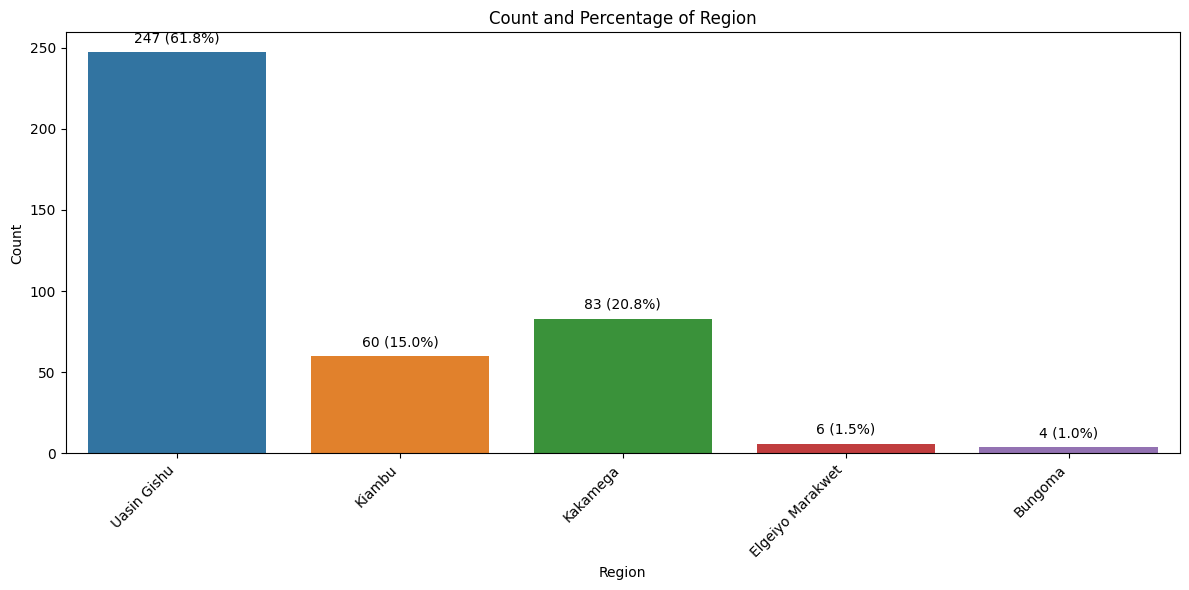

In [40]:
barplot_categorical(train,'Region')

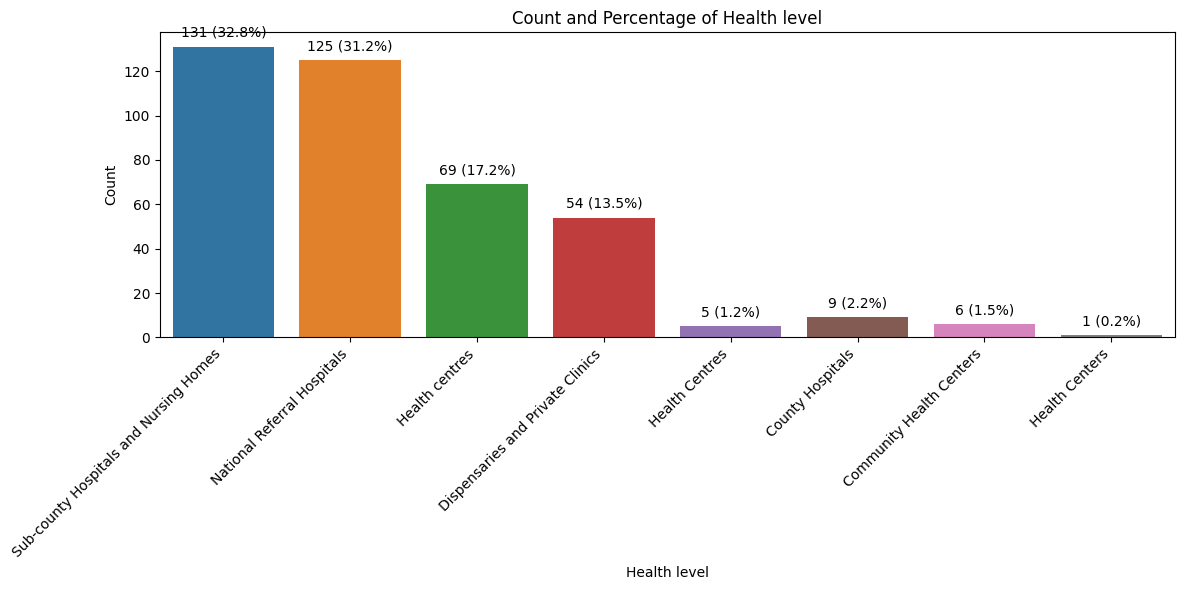

In [41]:
barplot_categorical(train,'Health level')

We notice that there's a typo mistake with the health centers

In [42]:
train['Health level'] = train['Health level'].replace('Health Centers', 'Health Centres')

### Health level

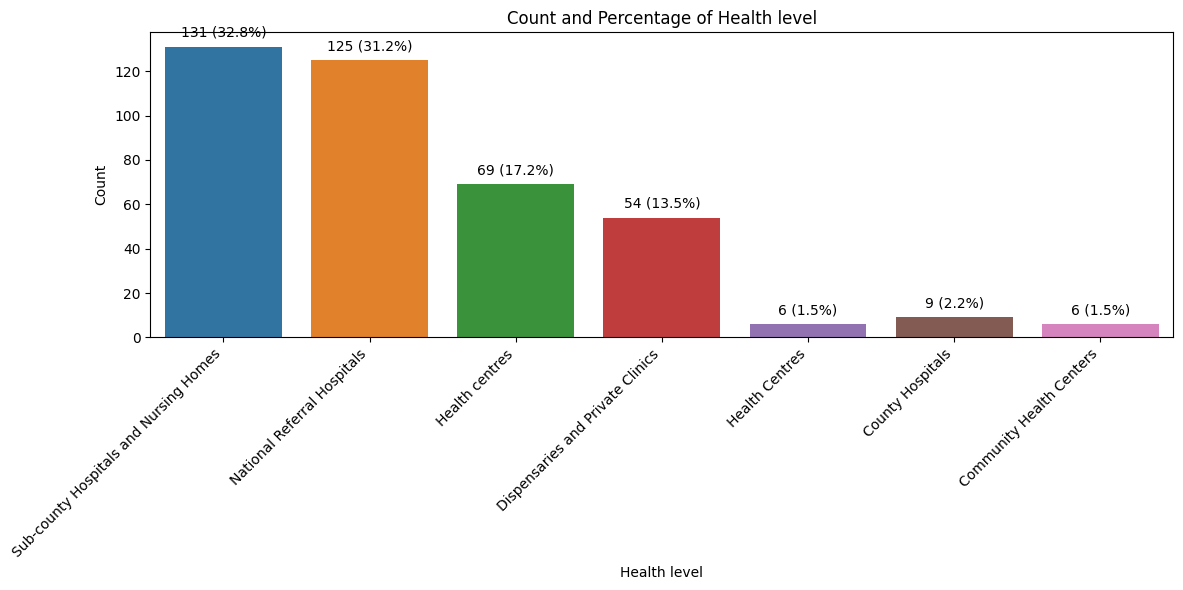

In [43]:
barplot_categorical(train,'Health level')

We also notice again that there are health centres too

In [44]:
train['Health level'] = train['Health level'].replace('Health Centres', 'Health centres')

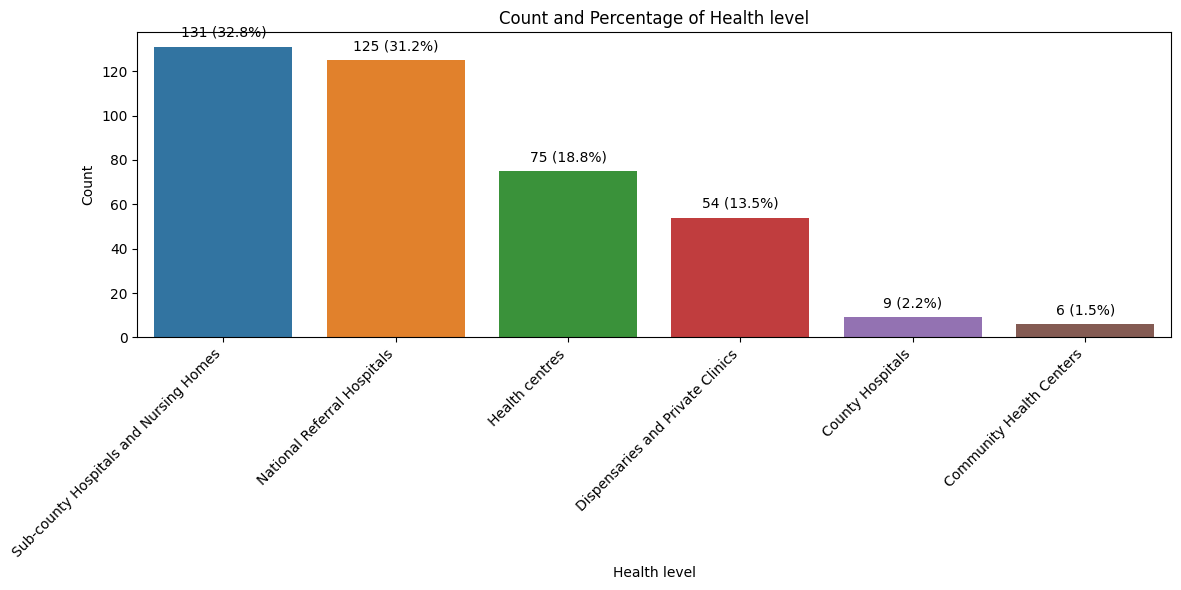

In [45]:
barplot_categorical(train,'Health level')

### Nursing Competency

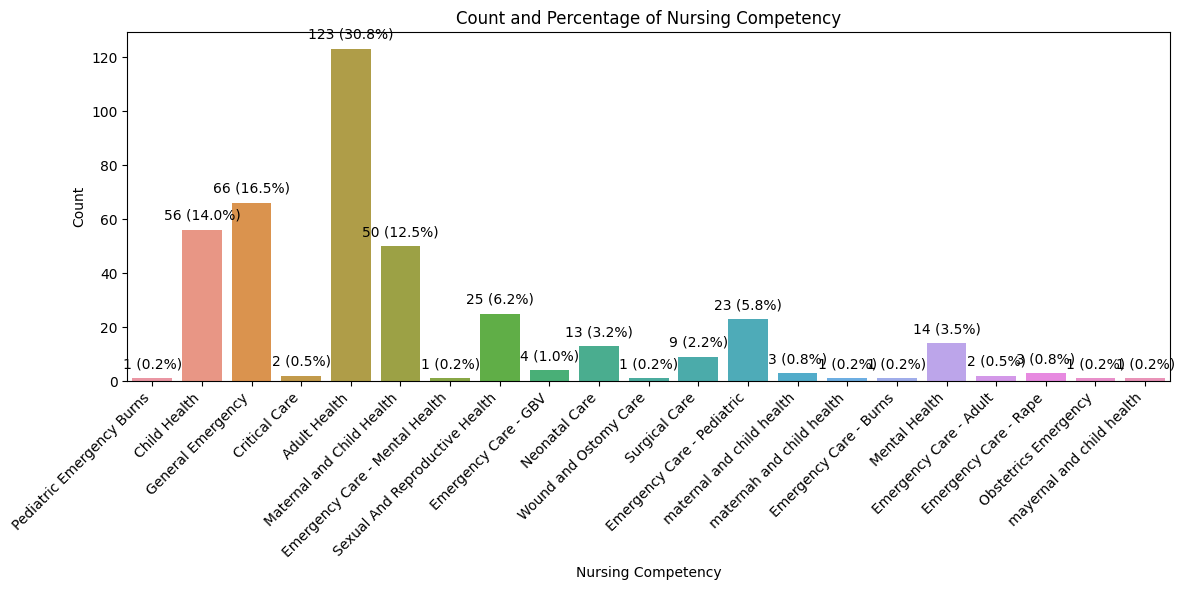

In [46]:
barplot_categorical(train,'Nursing Competency')

In [51]:
train['Nursing Competency'] = train['Nursing Competency'].replace('maternah and child health', 'maternal and child health')

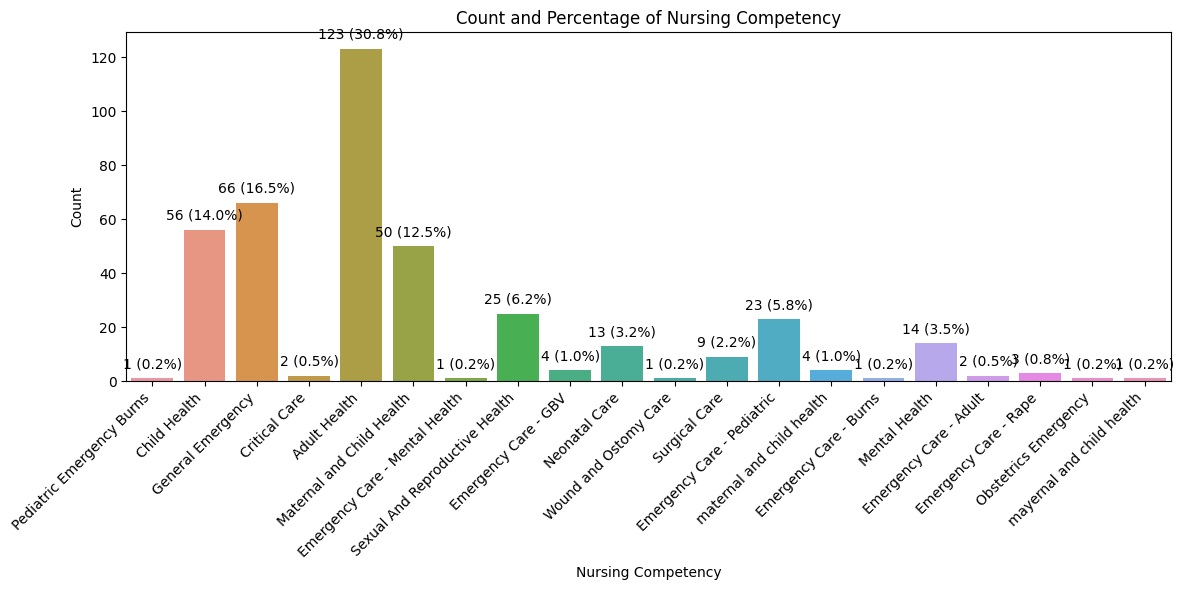

In [52]:
barplot_categorical(train,'Nursing Competency')

In [53]:
train['Nursing Competency'] = train['Nursing Competency'].replace('mayernal and child health', 'maternal and child health')

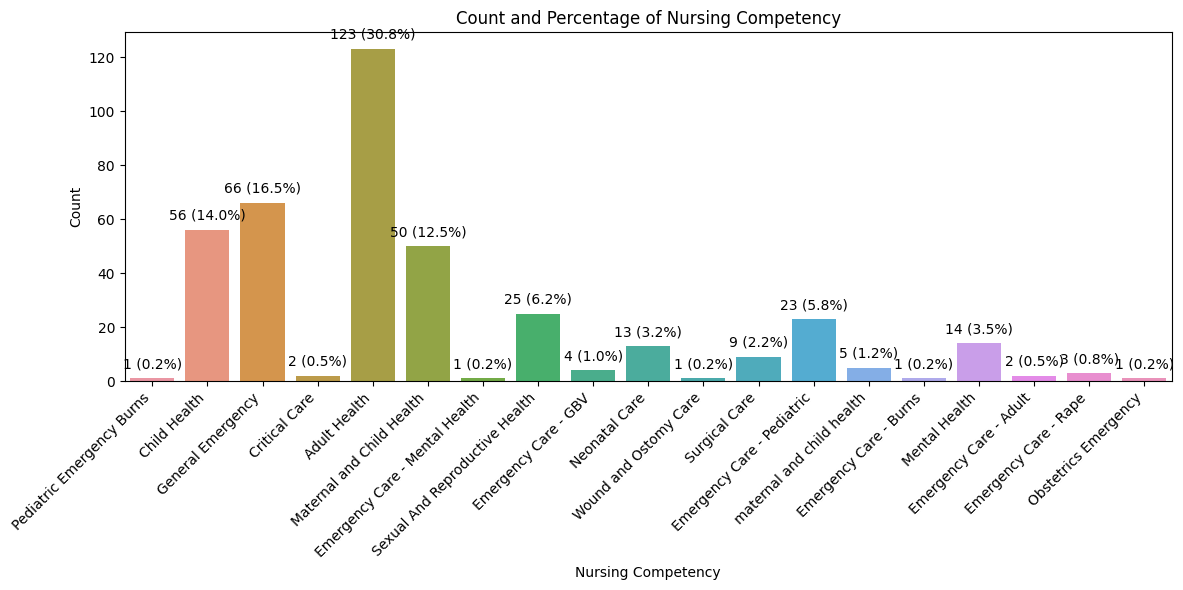

In [54]:
barplot_categorical(train,'Nursing Competency')

In [55]:
train['Nursing Competency'] = train['Nursing Competency'].replace('Maternal and Child Health', 'maternal and child health')

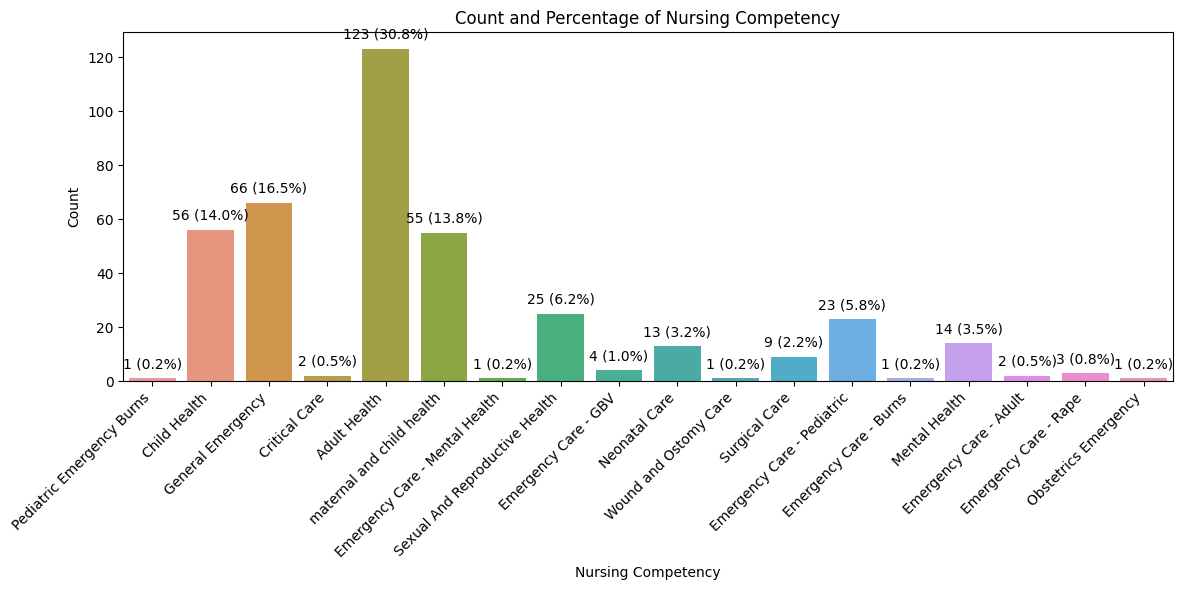

In [56]:
barplot_categorical(train,'Nursing Competency')

### Clinical Panel

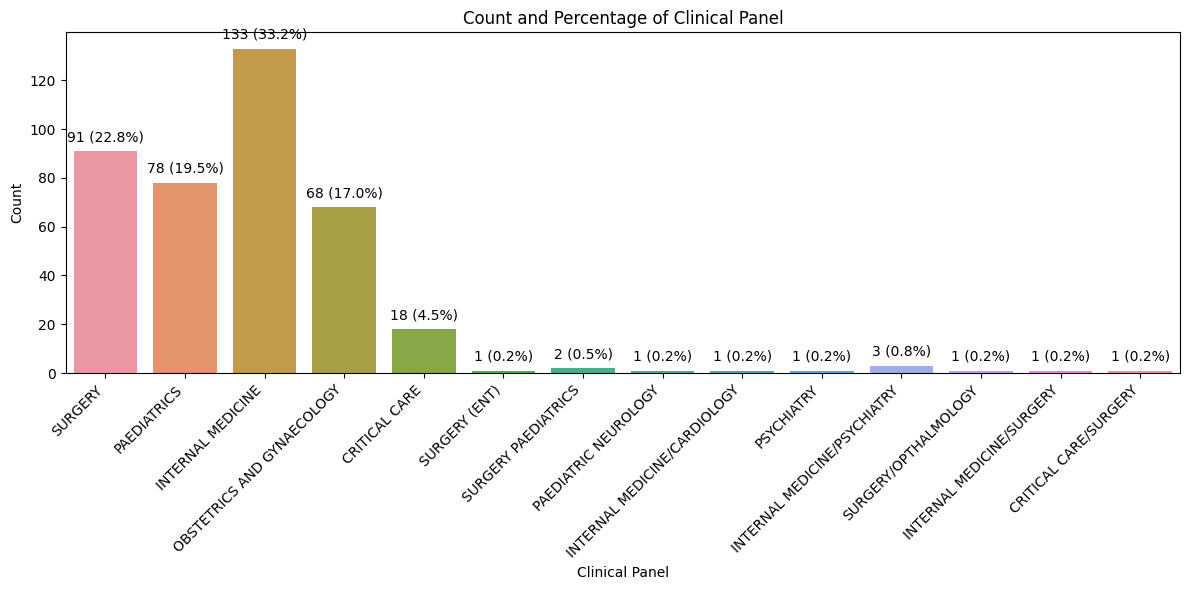

In [57]:
barplot_categorical(train,'Clinical Panel')

In [58]:
train['Clinical Panel'] = train['Clinical Panel'].replace('SURGERY (ENT)', 'SURGERY CANCER')

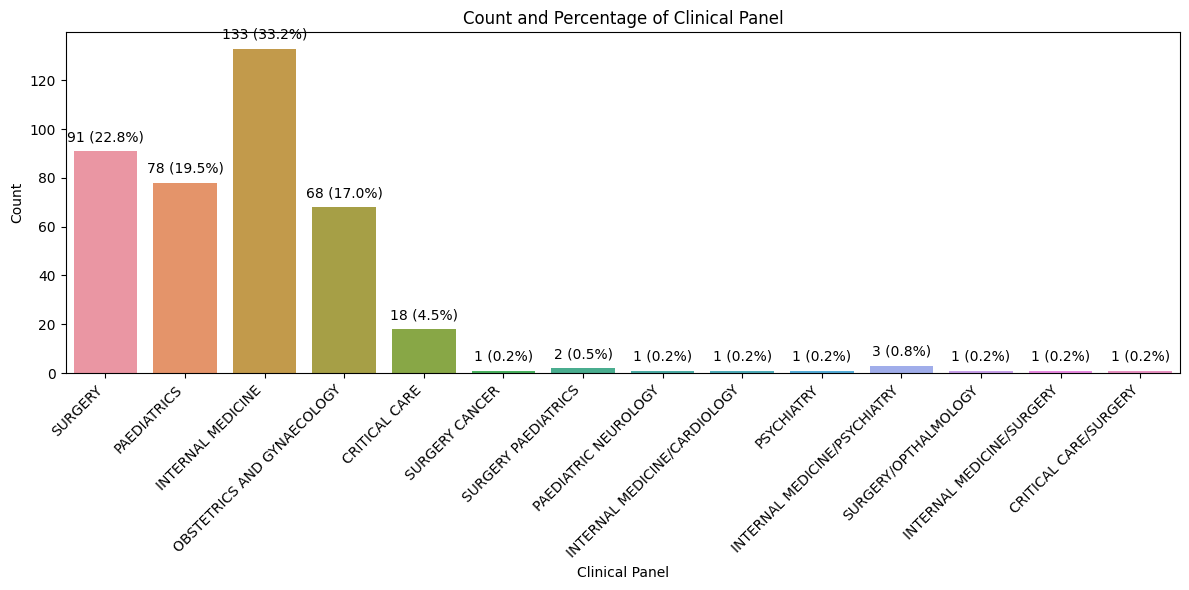

In [59]:
barplot_categorical(train,'Clinical Panel')

### Years of Experience

First things first, plotting the histogram

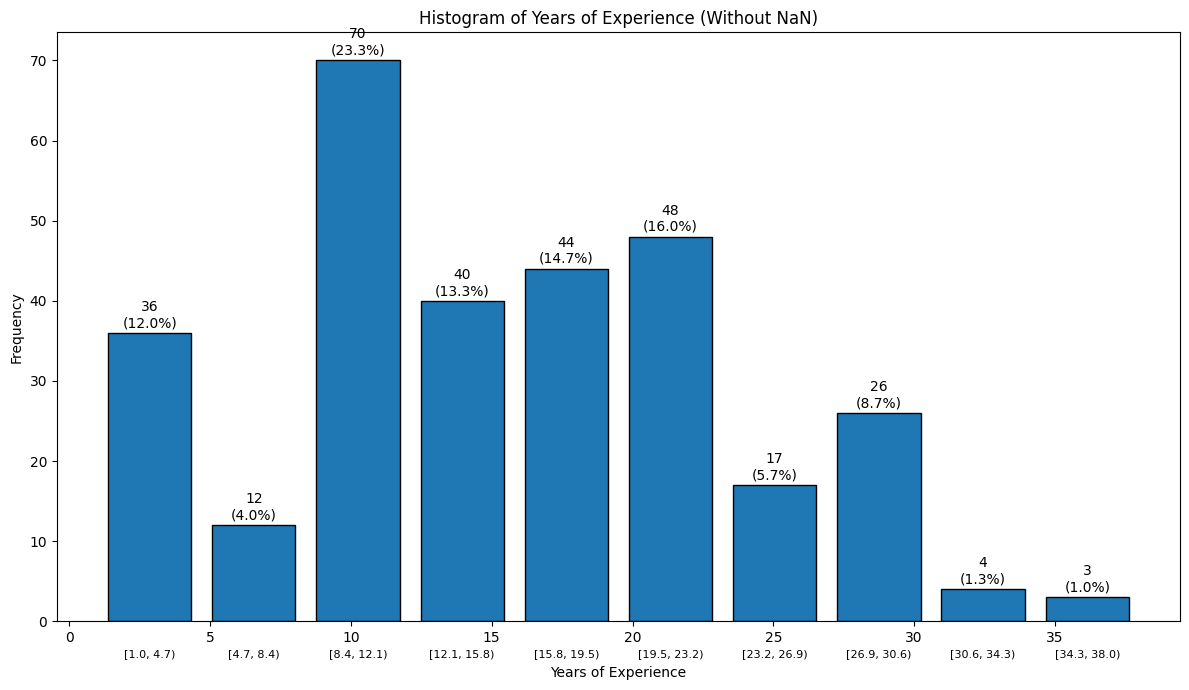

In [60]:
years_nan = train['Years of Experience'].dropna()

if not years_nan.empty:
    plt.figure(figsize=(12, 7))
    n, bins, patches = plt.hist(years_nan, bins=10, edgecolor='black', rwidth=0.8)

    total = len(years_nan)

    for i in range(len(patches)):
        count = int(n[i])
        percentage = f'{(count / total * 100):.1f}%'
        x = (bins[i] + bins[i+1]) / 2
        y = n[i]
        plt.text(x, y + 0.005 * max(n), f'{count}\n({percentage})', ha='center', va='bottom')

        bin_lower = f'{bins[i]:.1f}'
        bin_upper = f'{bins[i+1]:.1f}'
        plt.text(x, -0.05 * max(n), f'[{bin_lower}, {bin_upper})', ha='center', va='top', fontsize=8)

    plt.title('Histogram of Years of Experience (Without NaN)', y=1)    
    plt.xlabel('Years of Experience',labelpad=15)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
else:
    print("Warning: No numeric data available in 'Years of Experience' to plot the histogram.")

In [61]:
test=pd.read_csv("/kaggle/input/rural-kenyan-healthcare-challenge/test.csv")

In [62]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Master_Index         100 non-null    object 
 1   County               100 non-null    object 
 2   Health level         100 non-null    object 
 3   Years of Experience  75 non-null     float64
 4   Prompt               100 non-null    object 
 5   Nursing Competency   100 non-null    object 
 6   Clinical Panel       100 non-null    object 
dtypes: float64(1), object(6)
memory usage: 5.6+ KB


In [63]:
test.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Master_Index,County,Health level,Years of Experience,Prompt,Nursing Competency,Clinical Panel
0,ID_CUAOY,uasin gishu,sub county hospitals and nursing homes,2.0,i am a nurse with 2 years of experience in gen...,adult health,surgery ent
1,ID_OGSAY,kiambu,sub county hospitals and nursing homes,22.0,i am a nurse with 22 years of experience in ge...,child health,surgery
2,ID_TYHSA,uasin gishu,national referral hospitals,NaN,i am a nurse working in a national referral ho...,general emergency,internal medicine
3,ID_CZXLD,kakamega,dispensaries and private clinics,NaN,i am a nurse working in a dispensaries and pri...,child health,paediatrics
4,ID_ZJQUQ,kakamega,health centres,NaN,i am a nurse working in a health centres in ka...,child health,paediatrics


In [64]:
train['Prompt'] = train['Prompt'].str.lower()
train['Clinician'] = train['Clinician'].str.lower()
train['Health level'] = train['Health level'].str.lower()
train['Nursing Competency'] = train['Nursing Competency'].str.lower()
train['Clinical Panel'] = train['Clinical Panel'].str.lower()
train['Scenario'] = train['Scenario'].str.lower()


In [103]:
train['GPT4.0'] = train['GPT4.0'].str.lower()
train['LLAMA'] = train['LLAMA'].str.lower()
train['GEMINI'] = train['GEMINI'].str.lower()

In [65]:
print("\n--- Example Prompts and Clinician Responses ---")
for i in range(3):  # Show the first 3 examples
    print(f"Prompt {i+1}:")
    print(train['Prompt'][i])
    print(f"\nClinician Response {i+1}:")
    print(train['Clinician'][i])
    print("-" * 50)


--- Example Prompts and Clinician Responses ---
Prompt 1:
i am a nurse with 18 years of experience in general nursing working in a sub-county hospitals and nursing homes in uasin gishu county in kenya. a 4-year-old child presents to the emergency department with second-degree burns on the forearm after accidentally touching a hot stove. the child was playing in the kitchen when they reached out to touch the stove. the burns cover about 5% of the total body surface area. the child is alert and crying, with redness, blisters, and swelling on the affected area. the burns appear to be superficial to moderate in severity. the child is in mild pain, and there is no indication of airway or breathing distress. no other injuries are noted.
questions:
1. what is the immediate treatment protocol for second-degree burns in paediatric patients?
2. should any tetanus prophylaxis be considered in this case?
3. what follow-up care should be recommended for burn healing?

Clinician Response 1:
summary

In [66]:
train.rename(columns={'Region':'County'}, inplace=True)

In [67]:
train.columns.to_list()

['Master_Index',
 'County',
 'Health level',
 'Years of Experience',
 'Prompt',
 'Exact work',
 'Nursing Competency',
 'Scenario',
 'Clinical Panel',
 'Clinician',
 'GPT4.0',
 'LLAMA',
 'GEMINI',
 'DDX SNOMED']

## Feature Engineering

In [68]:
from sklearn.preprocessing import OneHotEncoder
categorical_cols = ['County', 'Health level', 'Exact work', 'Nursing Competency', 'Clinical Panel']
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [69]:
encoder.fit(train[categorical_cols])
encoded_cols = pd.DataFrame(encoder.transform(train[categorical_cols]),
                            index=train.index,
                            columns=encoder.get_feature_names_out(categorical_cols))

In [70]:
test.isnull().sum()

Master_Index            0
County                  0
Health level            0
Years of Experience    25
Prompt                  0
Nursing Competency      0
Clinical Panel          0
dtype: int64

In [71]:
test[['Exact location', 'Scenario']] = test['Prompt'].str.extract(r'i am a nurse with \d+ years of experience in ([^.]+)\.\s*(.*)', expand=True, flags=re.DOTALL)

In [72]:
test['Extracted Years'] = test['Prompt'].str.extract(r'i am a nurse with (\d+)', flags=re.IGNORECASE).astype(float)
test['Years of Experience'] = test['Years of Experience'].fillna(test['Extracted Years'])
test.drop(columns='Extracted Years', inplace=True)

In [73]:
missing_values_count = test.isnull().sum()
print("Missing Values in Test Data:")
print(missing_values_count)

Missing Values in Test Data:
Master_Index             0
County                   0
Health level             0
Years of Experience     25
Prompt                   0
Nursing Competency       0
Clinical Panel           0
Exact location         100
Scenario               100
dtype: int64


In [74]:
pd.set_option('display.max_colwidth', None)

In [75]:
missing_exact_loc_rows = test[test['Scenario'].isnull()]['Prompt']
print("\nRows with Missing 'Scenario':")
print(missing_exact_loc_rows)


Rows with Missing 'Scenario':
0                                                                                                                                                                                                                                                                                                 i am a nurse with 2 years of experience in general nursing working in a sub county hospitals and nursing homes in uasin gishu county in kenya a 24 year old female complains of sharp pain in the right side of the nose that started 2 days ago which has been gradually worsening no past medical history on assessment there is tenderness on palpation on the right side of the nasal bridge no visible signs of inflammation or infection vitals bp 129 81 mmhg pr 81 rr 20 t 36 8 spo2 94 question what could be the diagnosis of the patient
1                                                                                                                                                  

In [76]:
test['Exact work'] = test['Exact location'].str.extract(r'^(.*?)\s+working in')

In [77]:
missing_values_count = test.isnull().sum()
print("Missing Values in Test Data:")
print(missing_values_count)

Missing Values in Test Data:
Master_Index             0
County                   0
Health level             0
Years of Experience     25
Prompt                   0
Nursing Competency       0
Clinical Panel           0
Exact location         100
Scenario               100
Exact work             100
dtype: int64


In [78]:
test['Exact work'].fillna('Nurse', inplace=True)

print("\nNumber of missing values after replacement:", test['Exact work'].isnull().sum())
print("\nValue counts after replacement:")
print(test['Exact work'].value_counts())


Number of missing values after replacement: 0

Value counts after replacement:
Exact work
Nurse    100
Name: count, dtype: int64


<ipython-input-78-360804786394>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Exact work'].fillna('Nurse', inplace=True)


In [79]:
test = test.drop(columns=['Exact location'])

print("\nColumns in test DataFrame after removing 'Exact location':")
print(test.columns)


Columns in test DataFrame after removing 'Exact location':
Index(['Master_Index', 'County', 'Health level', 'Years of Experience',
       'Prompt', 'Nursing Competency', 'Clinical Panel', 'Scenario',
       'Exact work'],
      dtype='object')


In [80]:
missing_values_count = test.isnull().sum()
print("Missing Values in Test Data:")
print(missing_values_count)

Missing Values in Test Data:
Master_Index             0
County                   0
Health level             0
Years of Experience     25
Prompt                   0
Nursing Competency       0
Clinical Panel           0
Scenario               100
Exact work               0
dtype: int64


### Years of Experience

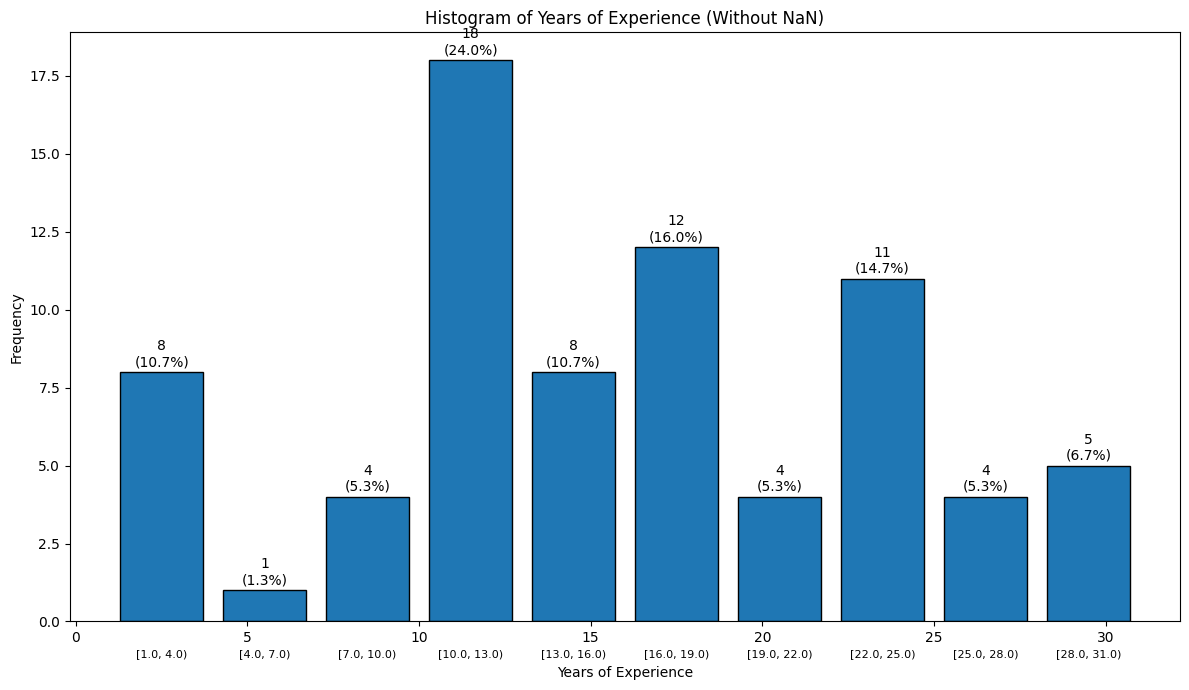

In [81]:
years_nan = test['Years of Experience'].dropna()

if not years_nan.empty:
    plt.figure(figsize=(12, 7))
    n, bins, patches = plt.hist(years_nan, bins=10, edgecolor='black', rwidth=0.8)

    total = len(years_nan)

    for i in range(len(patches)):
        count = int(n[i])
        percentage = f'{(count / total * 100):.1f}%'
        x = (bins[i] + bins[i+1]) / 2
        y = n[i]
        plt.text(x, y + 0.005 * max(n), f'{count}\n({percentage})', ha='center', va='bottom')

        bin_lower = f'{bins[i]:.1f}'
        bin_upper = f'{bins[i+1]:.1f}'
        plt.text(x, -0.05 * max(n), f'[{bin_lower}, {bin_upper})', ha='center', va='top', fontsize=8)

    plt.title('Histogram of Years of Experience (Without NaN)', y=1)    
    plt.xlabel('Years of Experience',labelpad=15)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
else:
    print("Warning: No numeric data available in 'Years of Experience' to plot the histogram.")

In [82]:
mean_years_of_experience = test['Years of Experience'].mean()
print(f"Mean Years of Experience: {mean_years_of_experience}")

Mean Years of Experience: 15.453333333333333


In [83]:
median_years_of_experience = test['Years of Experience'].median()
print(f"Median Years of Experience: {median_years_of_experience}")

Median Years of Experience: 15.0


In [84]:
test['Years of Experience'] = test['Years of Experience'].fillna(mean_years_of_experience)

In [85]:
test['Prompt'] = test['Prompt'].str.lower()
test['Health level'] = test['Health level'].str.lower()
test['Nursing Competency'] = test['Nursing Competency'].str.lower()
test['Clinical Panel'] = test['Clinical Panel'].str.lower()
test['Scenario'] = test['Scenario'].str.lower()

In [88]:
missing_values_count = test.isnull().sum()
print("Missing Values in Test Data:")
print(missing_values_count)

Missing Values in Test Data:
Master_Index           0
County                 0
Health level           0
Years of Experience    0
Prompt                 0
Nursing Competency     0
Clinical Panel         0
Scenario               0
Exact work             0
dtype: int64


In [87]:
def extract_scenario(df):
    scenario_regex = r"(?:.* in kenya )(.*)"  # Capture after " in kenya "
    df['Scenario'] = df['Prompt'].str.extract(scenario_regex, expand=False, flags=re.DOTALL)
    return df

test=extract_scenario(test)

In [89]:
from sklearn.preprocessing import OneHotEncoder
categorical_cols = ['County', 'Health level', 'Exact work', 'Nursing Competency', 'Clinical Panel']
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [95]:
encoder.fit(test[categorical_cols])
encoded_test_cols = pd.DataFrame(encoder.transform(test[categorical_cols]), # Use the same encoder!
                                index=test.index,
                                columns=encoder.get_feature_names_out(categorical_cols))

In [91]:
median_years_of_experience = train['Years of Experience'].median()
print(f"Median Years of Experience: {median_years_of_experience}")

Median Years of Experience: 15.0


In [92]:
mean_years_of_experience = train['Years of Experience'].mean()
print(f"Mean Years of Experience: {mean_years_of_experience}")

Mean Years of Experience: 15.526666666666667


In [93]:
# Impute Missing Values with the Median
train['Years of Experience'] = train['Years of Experience'].fillna(mean_years_of_experience)

In [104]:
train_df= pd.concat([train, encoded_cols], axis=1) #Trying the feature engineering

In [105]:
test_df= pd.concat([test, encoded_test_cols], axis=1) 

In [106]:
# Remove the 'Prompt' column from the training DataFrame
train_df = train_df.drop(columns=['Prompt'])

# Remove the 'Prompt' column from the testing DataFrame
test_df = test_df.drop(columns=['Prompt'])

# (Optional) Print the columns to verify the removal
print("Columns in train_df after removing 'Prompt':", train_df.columns)
print("Columns in test_df after removing 'Prompt':", test_df.columns)

Columns in train_df after removing 'Prompt': Index(['Master_Index', 'County', 'Health level', 'Years of Experience',
       'Exact work', 'Nursing Competency', 'Scenario', 'Clinical Panel',
       'Clinician', 'GPT4.0', 'LLAMA', 'GEMINI', 'DDX SNOMED',
       'County_Bungoma', 'County_Elgeiyo Marakwet', 'County_Kakamega',
       'County_Kiambu', 'County_Uasin Gishu',
       'Health level_community health centers',
       'Health level_county hospitals',
       'Health level_dispensaries and private clinics',
       'Health level_health centres',
       'Health level_national referral hospitals',
       'Health level_sub-county hospitals and nursing homes',
       'Exact work_Cardiology', 'Exact work_General nursing',
       'Exact work_General nursing and Primary care',
       'Exact work_Mental health and psychiatric nursing', 'Exact work_Nurse',
       'Exact work_Primary care', 'Nursing Competency_adult health',
       'Nursing Competency_child health', 'Nursing Competency_critical 

In [107]:
def preprocess_text(text, is_prompt=False):  # Add is_prompt flag
    if not isinstance(text, str):
        return ""  # Or handle non-string input appropriately

    text = text.lower()

    # Handle contractions
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"'re", " are", text)
    text = re.sub(r"'ve", " have", text)
    text = re.sub(r"'s", " is", text)  # Careful with possessives
    text = re.sub(r"'d", " would", text)
    text = re.sub(r"'ll", " will", text)
    text = re.sub(r"'m", " am", text)

    # Remove possessive apostrophes
    text = re.sub(r"patient's", "patient", text)

    # Selective punctuation handling
    if is_prompt:
        text = re.sub(r",", " ", text)  # Replace commas
        text = re.sub(r"\.(?!\w)", " ", text)  # Replace periods (not in abbreviations)
        text = re.sub(r"[!@#\$%^&\*\(\)+=\[\]\{\};:'\"]", "", text)  # Remove other noise
    else:  # For 'Clinician' responses, be more conservative
        text = re.sub(r"[!@#\$%^&\*\(\)+=\[\]\{\};'\"]", "", text)  # Remove some noise, keep more structure

    # Number handling (example: replace all numbers)
    text = re.sub(r"\d+", "<NUMBER>", text)

    # Whitespace
    text = re.sub(r"\s+", " ", text).strip()

    return text

In [110]:
train_df['Scenario'] = train_df['Scenario'].apply(preprocess_text, is_prompt=True)
train_df['Clinician'] = train_df['Clinician'].apply(preprocess_text, is_prompt=False)
train_df['GPT4.0'] = train_df['GPT4.0'].apply(preprocess_text, is_prompt=False)
train_df['LLAMA'] = train_df['LLAMA'].apply(preprocess_text, is_prompt=False)
train_df['GEMINI'] = train_df['GEMINI'].apply(preprocess_text, is_prompt=False)

test_df['Scenario'] = test_df['Scenario'].apply(preprocess_text, is_prompt=True)

In [111]:
from sklearn.model_selection import train_test_split

train_data, val_data = train_test_split(train_df, test_size=0.2, random_state=42) # 80% train, 20% validation

print("\n--- Train and Validation Data Sizes ---")
print(f"Train set size: {len(train_data)}")
print(f"Validation set size: {len(val_data)}")


--- Train and Validation Data Sizes ---
Train set size: 320
Validation set size: 80


## TF-IDF

In [112]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)

In [113]:
X_train_scenario = vectorizer.fit_transform(train_data['Scenario'])
X_train_scenario_df = pd.DataFrame(X_train_scenario.toarray(), index=train_data.index, columns=vectorizer.get_feature_names_out())
train_data = pd.concat([train_data.drop(columns=['Scenario']), X_train_scenario_df], axis=1)

In [114]:
X_val_scenario = vectorizer.transform(val_data['Scenario'])
X_val_scenario_df = pd.DataFrame(X_val_scenario.toarray(), index=val_data.index, columns=vectorizer.get_feature_names_out())
val_data = pd.concat([val_data.drop(columns=['Scenario']), X_val_scenario_df], axis=1)

In [115]:
X_test_scenario = vectorizer.transform(test_df['Scenario'])
X_test_scenario_df = pd.DataFrame(X_test_scenario.toarray(), index=test_df.index, columns=vectorizer.get_feature_names_out())
test_df = pd.concat([test_df.drop(columns=['Scenario']), X_test_scenario_df], axis=1)

In [116]:
from sklearn.metrics.pairwise import cosine_similarity
from nltk.metrics import jaccard_distance
from nltk.tokenize import word_tokenize
import nltk
import spacy 
try:
    nlp = spacy.load('en_core_web_sm')
except OSError:
    print("Downloading SpaCy model...")
    spacy.cli.download('en_core_web_sm')
    nlp = spacy.load('en_core_web_sm')

In [117]:
def compare_responses(row, model1, model2, scenario_col='Scenario'):  # Added scenario_col
    text1 = row[model1]
    text2 = row[model2]
    scenario_text = row[scenario_col]  # Get scenario text

    if not isinstance(text1, str) or not isinstance(text2, str) or not isinstance(scenario_text, str):
        return {}  # Handle non-string cases

    similarity_metrics = {}

    # Cosine Similarity (Responses)
    vectorizer_responses = TfidfVectorizer()
    vectors_responses = vectorizer_responses.fit_transform([text1, text2])
    similarity_metrics['response_cosine_similarity'] = cosine_similarity(vectors_responses)[0, 1]

    # Jaccard Distance (Responses)
    tokens1 = set(word_tokenize(text1))
    tokens2 = set(word_tokenize(text2))
    similarity_metrics['response_jaccard_distance'] = 1 - jaccard_distance(tokens1, tokens2)

    # SpaCy Similarity (Responses)
    doc1 = nlp(text1)
    doc2 = nlp(text2)
    similarity_metrics['response_spacy_similarity'] = doc1.similarity(doc2)

    # Cosine Similarity (Response vs. Scenario)
    vectorizer_scenario = TfidfVectorizer()
    vectors_scenario = vectorizer_scenario.fit_transform([text1, scenario_text])
    similarity_metrics['response1_scenario_cosine'] = cosine_similarity(vectors_scenario)[0, 1]

    vectors_scenario = vectorizer_scenario.fit_transform([text2, scenario_text])
    similarity_metrics['response2_scenario_cosine'] = cosine_similarity(vectors_scenario)[0, 1]

    return similarity_metrics

In [120]:
if 'GPT4.0' in train_data and 'Clinician' in train_data and 'Scenario' in train_data:
    train_data_results = train_data.apply(compare_responses, axis=1, model1='Clinician', model2='GPT4.0')
    train_data_df = pd.concat([train_data_df, pd.DataFrame(comparison_results.tolist())], axis=1)
    print(train_data_df[['Clinician', 'GPT4.0', 'Scenario', 'response_cosine_similarity', 'response1_scenario_cosine']].head())